In [5]:
from matplotlib import pyplot as plt
import sea2025
from part2_opf_helpers import clear_market, postprocess, make_graph, plot_graph

def process(data):
    """Solves OPF problem and displays results."""
    result = clear_market(data)
    postprocess(result)  # add fields
    graph = make_graph(result)
    print("Cycle edges:")
    print(sea2025.verification.cycle_edges(graph))
    plot_graph(graph)
    plt.show(block=False)
    return graph

Cycle edges:
           name  from    to   flow  reactance  delta_angle
0  Bus1Bus2Bus3  Bus1  Bus2   50.0       0.25        0.125
1  Bus1Bus2Bus3  Bus2  Bus3   50.0       0.25        0.125
2  Bus1Bus2Bus3  Bus1  Bus3  100.0       0.25       -0.250


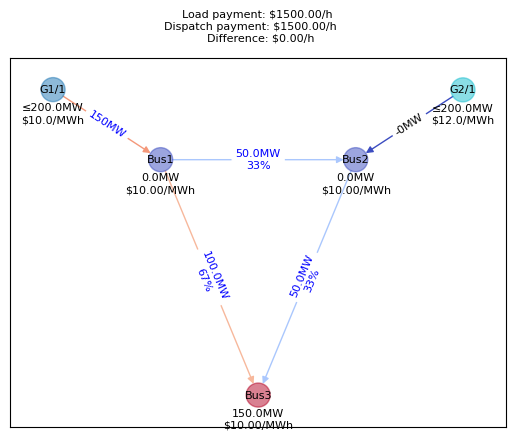

In [6]:
data = sea2025.data.read("data/triangle1")
graph = process(data);

Cycle edges:
           name  from    to   flow  reactance  delta_angle
0  Bus1Bus2Bus3  Bus1  Bus2   50.0       0.25        0.125
1  Bus1Bus2Bus3  Bus2  Bus3   50.0       0.25        0.125
2  Bus1Bus2Bus3  Bus1  Bus3  100.0       0.25       -0.250


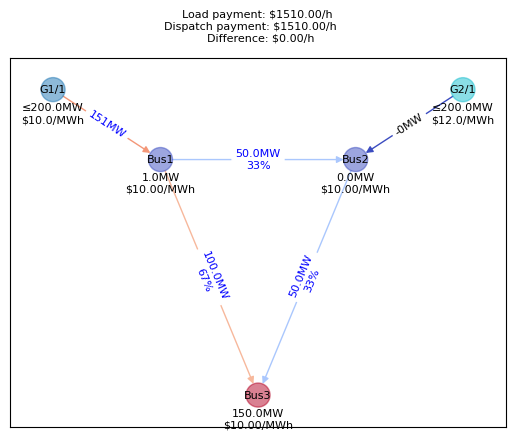

In [7]:
data.buses.at[0, "load"] += 1.0
process(data);